In [36]:
import os
from plot import plot
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import analysis
import shelve
from kapascan.sensor import SENSORS
from string import Template

In [12]:
datadir = "data"
measurement = "background_small_new"
measurement_nr = list(range(0, 3)) + list(range(10, 23))

In [13]:
base_dirname = os.path.join(datadir, measurement)
base_filename = '%03d_%s.npy'

In [38]:
x, y, z, T = [[] for _ in range(4)]
for i in measurement_nr:
    x.append(np.load(os.path.join(base_dirname, base_filename % (i, "x"))))
    y.append(np.load(os.path.join(base_dirname, base_filename % (i, "y"))))
    z.append(np.load(os.path.join(base_dirname, base_filename % (i, "z"))))
    T.append(np.load(os.path.join(base_dirname, base_filename % (i, "T"))))
with shelve.open(os.path.join(base_dirname, "002_settings")) as file:
    settings = file['settings']

(<matplotlib.figure.Figure at 0x7f3e270dc780>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3e270ccba8>)

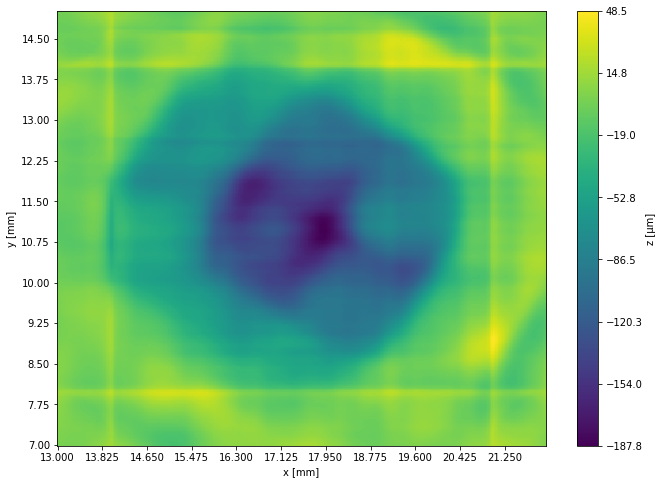

In [107]:
noise = (z[4] - z[5]) * 0.0005
noise -= noise.mean()
sample = z[1] - z[4]

diameter = SENSORS[settings['sensors'][0]]['diameter']
stepsize = (x[0][1] - x[0][0])
diameter_pixel = int(diameter / stepsize + 0.5) + 1
sensor = analysis.sensor_function(diameter_pixel)

z_reconstructed = analysis.wiener(sample, sensor, 0.0008, 1)

plot(x[0], y[0], z_reconstructed , "z")

In [11]:
T_flat = []
for Ti in T:
    T_flat.append(Ti.flatten())
T_flat = np.concatenate(T_flat)

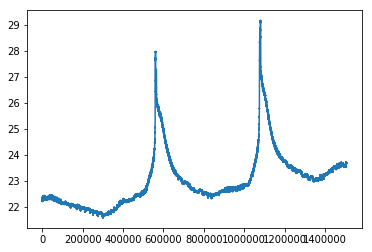

In [30]:
plt.plot(T_flat)